In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import cv2

In [2]:
path = 'D:\\IIM Course\\Capstone Project\\Project/'
os.listdir(path)

['.ipynb_checkpoints',
 'fashion',
 'fashion.zip',
 'ImgClassification.ipynb',
 'train.csv']

In [3]:
train_df = pd.read_csv(path + 'train.csv')
train_df.head()

,files,target,images
0,../input/fashiondata/data/shoes/5da81ceb7861c2...,shoes,5da81ceb7861c2af6a5a89a7_1.jpg
1,../input/fashiondata/data/beauty/5da81d8a7861c...,beauty,5da81d8a7861c2af6a5a901c_3.jpg
2,../input/fashiondata/data/beauty/5da820f26504f...,beauty,5da820f26504fb65da0043e6_0.jpg
3,../input/fashiondata/data/jewelry and watches/...,jewelry and watches,5da81c026504fb65cea700d2_0.jpg
4,../input/fashiondata/data/bags/5da81d2c7861c2a...,bags,5da81d2c7861c2af6a5a8c64_2.jpg


In [4]:
train_df.isnull().sum().sum()

0

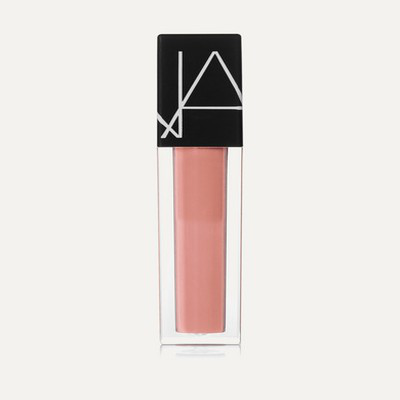

In [5]:
from PIL import Image
Image.open('D:\\IIM Course\\Capstone Project\\Project\\fashion/5da820f26504fb65da0043e6_0.jpg')

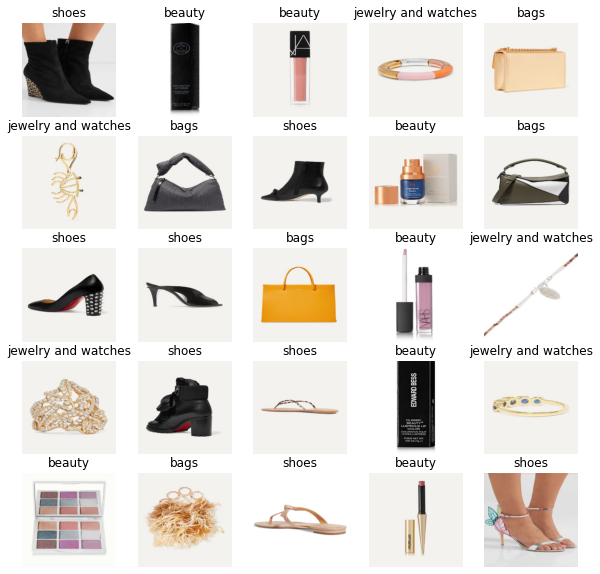

In [37]:
plt.figure(figsize=(10, 10))

for i in range(25):
    ax = plt.subplot(5, 5, i + 1)
    img = mpimg.imread(path + '/fashion/' + train_df["images"][i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(train_df["target"][i])
    plt.axis("off")
    
    X = np.array(train_df)

In [42]:
from tqdm import tqdm


In [44]:
train_image = []
for i in tqdm(range(train_df.shape[0])):
    img = image.load_img(path + '/fashion/' +train_df['images'][i],target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|█████████████████████████████████████████████████████████████████████████████| 6000/6000 [00:22<00:00, 267.77it/s]


In [45]:
X.shape

(6000, 224, 224, 3)

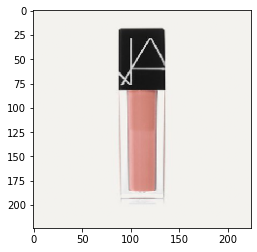

In [74]:
plt.imshow(X[2])


In [76]:
train_df['target'][2]


'beauty'

In [46]:
train_df['target'].unique()


array(['shoes', 'beauty', 'jewelry and watches', 'bags'], dtype=object)

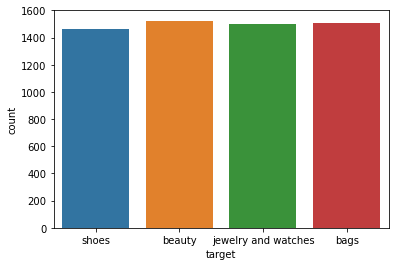

In [47]:
sns.countplot(train_df['target'])


In [10]:
train_df["target"].value_counts()


beauty                 1524
bags                   1508
jewelry and watches    1503
shoes                  1465
Name: target, dtype: int64

In [ ]:
class_map = {
    'shoes': 0,
    'beauty': 1,
    'jewelry and watches': 2,
    'bags': 3
}


In [ ]:
train_df['target'] = train_df['target'].map(class_map).astype(np.uint8)
train_df.head()

In [60]:
y = np.array(train_df.drop(['target', 'files'],axis=1))
y.shape

(6000, 1)

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [63]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [64]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [65]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 220, 220, 16)      1216      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 110, 110, 16)      0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 106, 106, 32)      12832     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 53, 53, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 49, 49, 64)       

In [72]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [73]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=64)


Epoch 1/10


ValueError: in user code:

    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:755 train_step
        loss = self.compiled_loss(
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:203 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:152 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:256 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\user\anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:173 sigmoid_cross_entropy_with_logits
        raise ValueError("logits and labels must have the same shape (%s vs %s)" %

    ValueError: logits and labels must have the same shape ((None, 25) vs (None, 1))


In [ ]:
classes = np.array(train_df.columns[2:])
proba = model.predict(img.reshape(1,400,400,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [ ]:
WORK_DIR = "../input/humpback-whale-identification"
label_col = "Id"
img_col = "Image"
train_folder = "train"
test_folder = "test"

os.listdir(WORK_DIR)

In [ ]:
train.shape


In [ ]:
train.isnull().sum().sum()

In [ ]:
train.describe()

In [ ]:
y_train = train["target"]
X_train = train.drop(labels = ["target"], axis = 1)
y_train.head()

In [ ]:
pip install keras

In [ ]:
pip install tensorflow

In [ ]:
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input

def prepareImages(train, shape, path):
    
    x_train = np.zeros((shape, 100, 100, 3))
    count = 0
    
    for fig in train['images']:
        
       
        img = image.load_img("D:\\IIM Course\\Capstone Project\\Project\\fashion/"+path+"/"+fig, target_size=(100, 100, 3))
        x = image.img_to_array(img)
        x = preprocess_input(x)

        x_train[count] = x
        if (count%500 == 0):
            print("Processing image: ", count+1, ", ", fig)
        count += 1
    
    return x_train

In [ ]:
import os
import zipfile
import pandas as pd
import numpy as np

img_zip_path = 'fashion.zip'
zip_ref = zipfile.ZipFile(img_zip_path, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
#mport glob
%pip install opencv-python
#or filename in glob.iglob(root_dir + '**/*.jpg', recursive=True):
    

In [ ]:
filenames = glob.glob("D:\IIM Course\Capstone Project\Project\fashion/*.jpg")
filenames.sort()
images = [cv2.imread(img) for img in filenames]

for img in images:
    print(img)

In [ ]:
from PIL import Image
Image.open('D:\\IIM Course\\Capstone Project\\Project\\fashion/5da820f26504fb65da0043e6_0.jpg')


In [ ]:
glob('D:\\IIM Course\\Capstone Project\\Project\\fashion/*.jpg')
